In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Crop Production Data.csv')
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [4]:
print(df.columns)

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')


In [5]:
from sklearn import preprocessing 

obj = list(df.select_dtypes(include=['object']).columns)
df[obj]
label_encoder = preprocessing.LabelEncoder() 
for col in obj:
    df[col] = label_encoder.fit_transform(df[col])
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,0,427,2000,1,2,1254.0,2000.0
1,0,427,2000,1,74,2.0,1.0
2,0,427,2000,1,95,102.0,321.0
3,0,427,2000,4,7,176.0,641.0
4,0,427,2000,4,22,720.0,165.0
...,...,...,...,...,...,...,...
246086,32,471,2014,3,95,306.0,801.0
246087,32,471,2014,3,102,627.0,463.0
246088,32,471,2014,4,106,324.0,16250.0
246089,32,471,2014,5,95,279151.0,597899.0


In [6]:
matrix1=df.corr()
matrix1

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
State_Name,1.000000,-0.045012,-0.028258,-0.026078,0.013974,0.039796,-0.009502
District_Name,-0.045012,1.000000,-0.004657,0.016742,-0.005774,-0.019722,0.010130
Crop_Year,-0.028258,-0.004657,1.000000,-0.032866,0.002213,-0.026022,0.006989
Season,-0.026078,0.016742,-0.032866,1.000000,0.035954,-0.047082,0.045543
Crop,0.013974,-0.005774,0.002213,0.035954,1.000000,0.064830,-0.035280
Area,0.039796,-0.019722,-0.026022,-0.047082,0.064830,1.000000,0.040587
Production,-0.009502,0.010130,0.006989,0.045543,-0.035280,0.040587,1.000000


<Axes: >

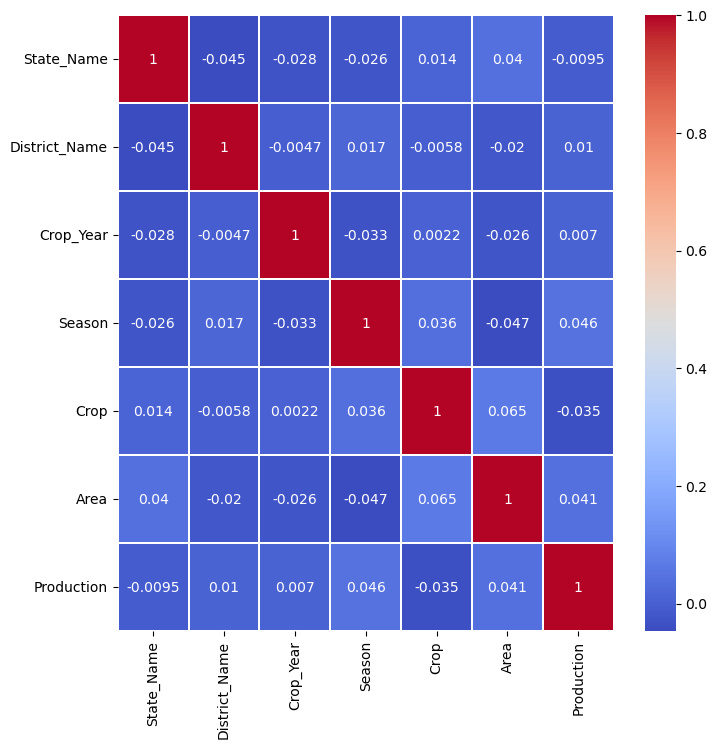

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,8)) 
sns.heatmap(matrix1,cmap='coolwarm', linewidths=.2, annot=True,ax=ax)

In [8]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [9]:
column_name = 'Production'
average = df[column_name].mean()
df[column_name].fillna(average, inplace=True)
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,0,427,2000,1,2,1254.0,2000.0
1,0,427,2000,1,74,2.0,1.0
2,0,427,2000,1,95,102.0,321.0
3,0,427,2000,4,7,176.0,641.0
4,0,427,2000,4,22,720.0,165.0
...,...,...,...,...,...,...,...
246086,32,471,2014,3,95,306.0,801.0
246087,32,471,2014,3,102,627.0,463.0
246088,32,471,2014,4,106,324.0,16250.0
246089,32,471,2014,5,95,279151.0,597899.0


In [10]:
df.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = df[['Crop','Crop_Year', 'Area']]  
y = df['Production']           

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

new_data_point = [[95,4,1024.4]]  
predicted_production = model.predict(new_data_point)
print("Predicted Production:", predicted_production)

Mean Squared Error: 55250168737406.51
R-squared: 0.6537439101589093
Predicted Production: [1173.]


C:\Users\prash\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
